<a href="https://colab.research.google.com/github/Cknowles11/DS-Unit-1-Sprint-2-Statistics/blob/master/Carlos_Knowles_LS_DS_122_Chi2_Tests_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Practice Chi^2 Tests

Use the following dataset relating to math scores of students in two different Portugese schools:

<https://archive.ics.uci.edu/ml/datasets/Student+Performance>

### 1) Load the dataset specifically relating to math scores as a new dataframe.

There are two datasets in the `student.zip` file, make sure you use `student-mat.csv`.


In [ ]:
from scipy.stats import ttest_1samp, ttest_ind, chi2_contingency
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip'

--2020-07-26 22:10:50--  https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20478 (20K) [application/x-httpd-php]
Saving to: ‘student.zip.1’

student.zip.1       100%[===================>]  20.00K  --.-KB/s    in 0.04s   

2020-07-26 22:10:50 (554 KB/s) - ‘student.zip.1’ saved [20478/20478]



In [ ]:
!unzip '/content/student.zip' 

Archive:  /content/student.zip
replace student-mat.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace student-por.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace student-merge.R? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace student.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
student_math = pd.read_csv('student-mat.csv', sep = ';')
student_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [ ]:
student_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
student_math.describe(exclude = 'number')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


### 2) Use Chi^2 tests and `stats.chi2_contingency()` to identify:
 - Two pairs of variables that are dependent (are associated with one another).
 - Two pairs of variables that are independent (have no significant relationship).

Does it make intuitive sense why the variables in these pairs might or might not show a relationship to one another? 


In [ ]:
# YOUR WORK HERE
student_math['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

In [ ]:
cut_points = [-1,10, 15, 100]
student_math['math_score'] = pd.cut(student_math['G3'], cut_points, labels = ['low', 'med', 'hi'])
student_math['math_score'].value_counts().sort_index()

low    186
med    169
hi      40
Name: math_score, dtype: int64

In [ ]:
student_math['internet'].value_counts()

yes    329
no      66
Name: internet, dtype: int64

In [ ]:
pd.crosstab(student_math['internet'], student_math['math_score'], normalize = 'index')

math_score,low,med,hi
internet,,,
no,0.575758,0.378788,0.045455
yes,0.449848,0.437690,0.112462


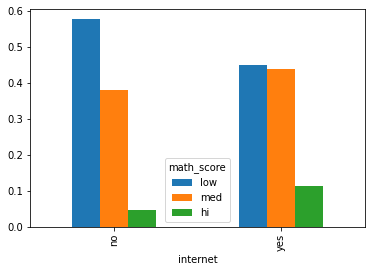

In [ ]:
pd.crosstab(student_math['internet'], student_math['math_score'], normalize = 'index').plot(kind = 'bar');

In [ ]:
mtab = pd.crosstab(student_math['internet'], student_math['math_score'])
mtab

math_score,low,med,hi
internet,,,
no,38,25,3
yes,148,144,37


In [ ]:
chi2_contingency(mtab)

(4.733905211358225,
 0.09376603341330782,
 2,
 array([[ 31.07848101,  28.23797468,   6.6835443 ],
        [154.92151899, 140.76202532,  33.3164557 ]]))

In [ ]:
student_math['goout'].describe()

count    395.000000
mean       3.108861
std        1.113278
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

In [ ]:
cut_points = [0,2, 3, 100]
student_math['goout_count'] = pd.cut(student_math['goout'], cut_points, labels = ['low', 'med', 'hi'])
student_math['goout_count'].value_counts().sort_index()

low    126
med    130
hi     139
Name: goout_count, dtype: int64

In [ ]:
student_math['nursery'].value_counts()

yes    314
no      81
Name: nursery, dtype: int64

In [ ]:
ltab = pd.crosstab(student_math['goout_count'], student_math['sex'], normalize = 'index')
ltab

sex,F,M
goout_count,,
low,0.555556,0.444444
med,0.538462,0.461538
hi,0.489209,0.510791


In [ ]:
chi2_contingency(ltab)

(0.009522605875173038, 0.9952500140968444, 2, array([[0.52774191, 0.47225809],
        [0.52774191, 0.47225809],
        [0.52774191, 0.47225809]]))

### 3) Use NumPy to perform your own chi^2 test "from scratch" 

Pick any of the chi^2 tests that you ran in part 2 and try them on your own. You should get the same results that Scipy got for all four values returned from `chi2_contingency()`

In [ ]:
# YOUR WORK HERE
row_sums= mtab.iloc[0:2, 3].values
col_sums= mtab.iloc[2, 0:3].values
print(row_sums)
print(col_sums)

[ 66 329]
[186 169  40]


In [ ]:
total = mtab.loc['All', 'All']
total

395

In [ ]:
student_math.shape[0]

395

In [ ]:
expected = []
for i in range(len(row_sums)):
    expected_row = []
    for column in col_sums:
        expected_val = column*row_sums[i]/total
        expected_row.append(expected_val)
    expected.append(expected_row)
    
expected = np.array(expected)
print(expected.shape)  
print(expected)

(2, 3)
[[ 31.07848101  28.23797468   6.6835443 ]
 [154.92151899 140.76202532  33.3164557 ]]


In [ ]:
observed = pd.crosstab(student_math['internet'], student_math['math_score']).values
print(observed.shape)
observed

(2, 3)


array([[ 38,  25,   3],
       [148, 144,  37]])

In [ ]:
chi_squared = ((observed - expected)**2/(expected)).sum()
print(f"Chi_Sqaured: {chi_squared}")

Chi_Sqaured: 4.733905211358225


In [ ]:
dof = (len(row_sums)-1)*(len(col_sums)-1)
print(f"Degrees of Freedom: {dof}")

Degrees of Freedom: 2


In [ ]:
##SciPy
chi_squared, p_value, dof, expected = chi2_contingency(observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 4.733905211358225
P-value: 0.09376603341330782
Degrees of Freedom: 2
Expected: 
 [[ 31.07848101  28.23797468   6.6835443 ]
 [154.92151899 140.76202532  33.3164557 ]]


## Stretch goals:

### 1. Refactor your code so it is elegant, readable, and holds reusable code in functions.

In [ ]:
# YOUR WORK HERE



### 2. Check For Understanding - Study and write your own explanations/definitions for these topics:

- What is a sample "estimate" in statistics?

- What are hypothesis test? How are they useful?

- What is a "null hypothesis?"

- What is a p-value and what does it represent?

- What does it mean for something to be "statistically significant?"

- What is a test statistic and how does it relate to a p-value?

- What are "degrees of freedom" and how are they calculated in a 1-sample, 2-sample, and chi^2 test for independence?

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)